---
CSC 268 Lab 13:  Hough Transforms
---

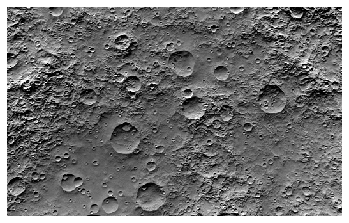

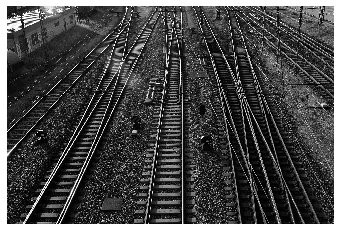

In [1]:
import cv2 as cv
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter, line as draw_line
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.util import img_as_ubyte
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('image', cmap='gray')

def imshow(img,cmap=None):
    plt.imshow(img,cmap=cmap,interpolation='none')
    plt.axis('off')
    plt.show()
    
craters = cv.imread('craters.jpg',0).astype(np.float32)/255.0
tracks = cv.imread('tracks.jpg',0).astype(np.float32)/255.0
imshow(craters)
imshow(tracks)

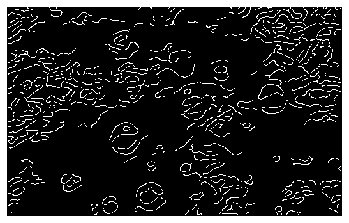

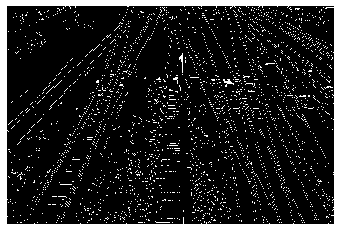

In [2]:
ec = canny(craters,sigma=3)
et = canny(tracks,sigma=3)
imshow(ec)
imshow(et)

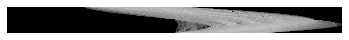

(array([679, 608, 559, 517, 503, 490, 488, 486, 448, 437, 423, 410, 400,
       396, 381, 379, 378, 377, 373, 366, 361, 357, 353, 346],
      dtype=uint64), array([ 0.8115781 ,  0.43633231,  0.55850536,  0.13962634, -0.00872665,
       -0.41887902, -0.13962634,  0.74176493, -0.31415927, -0.46251225,
       -0.86393798, -0.43633231,  0.51487213, -0.47996554, -0.48869219,
       -0.33161256, -0.9250245 , -0.28797933, -0.27052603, -0.12217305,
        0.43633231, -0.42760567, -0.29670597, -0.26179939]), array([ 531.,  824.,  753.,  984., 1027., 1159., 1285.,  595., 1047.,
       1013.,  847., 1035.,  710.,  835., 1136., 1032.,  806., 1182.,
       1292., 1301.,  801., 1052., 1169., 1303.]))


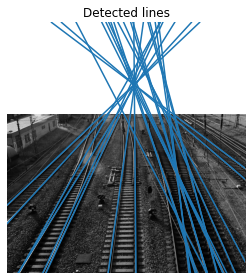

In [3]:
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = hough_line(et, theta=tested_angles)
imshow(np.log(1+h).T)
print(hough_line_peaks(h, theta, d))
plt.imshow(tracks)
plt.axis('off')
plt.title('Detected lines')

for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    plt.axline((x0, y0), slope=np.tan(angle + np.pi/2))

plt.tight_layout()
plt.show()

[10 12 14 16 18 20 22 24 26 28 30 32 34]
[0.546875   0.5        0.46875    0.46590909 0.45833333 0.453125
 0.45192308 0.44444444 0.4375    ] [224  95 343  97 180 453 294 335 185] [297 272 169 275  56  42 159 105 207] [22 10 10 14 12 10 18 12 24]


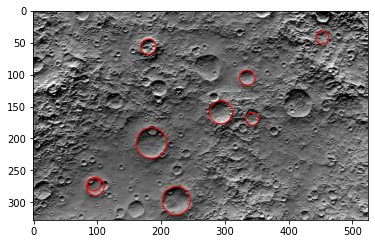

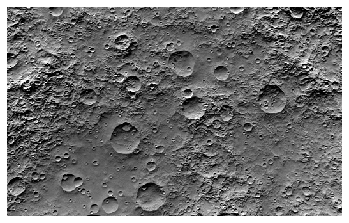

In [ ]:
# Detect two radii
hough_radii = np.arange(10, 35, 2)
print(hough_radii)
hough_res = hough_circle(ec, hough_radii)

# Select the most prominent 3 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=9)
print(accums,cx,cy,radii)

figure, axes = plt.subplots()
plt.imshow(craters)
for i in range(cx.size):
    c = plt.Circle((cx[i],cy[i]),radii[i],fill=False,color='r')
    axes.add_artist(c)
plt.show()
imshow(craters)

### Sources

https://scikit-image.org/docs/dev/auto_examples/edges/plot_line_hough_transform.html
https://scikit-image.org/docs/stable/auto_examples/edges/plot_circular_elliptical_hough_transform.html
https://scikit-image.org/docs/stable/auto_examples/edges/plot_canny.html